In [1]:
# imports
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime as dt
#import scipy.stats as st
#from pandas_profiling import ProfileReport
#import missingno as msno

# Extract & Load

In [2]:
csv_path = './data/'

In [3]:
def get_data(csv_path):
    file_names = [x for x in os.listdir(csv_path) if ".csv" in x]
    # file_names_base = file_names
    key_names = [
        key_name.removesuffix('.csv').removeprefix('EdStats')
        for key_name in file_names
    ]

    data_dict = {}
    for k, f in zip(key_names, file_names):
        data_dict[k] = pd.read_csv(os.path.join(csv_path, f))

    return data_dict

In [4]:
data = get_data(csv_path)

# Assess Dataset

## Fct build 

In [5]:
ls -lh ./data

total 353M
-rw-r--r-- 1 mijka mijka 137K 22 janv.  2018 EdStatsCountry.csv
-rw-r--r-- 1 mijka mijka  48K 22 janv.  2018 EdStatsCountry-Series.csv
-rw-r--r-- 1 mijka mijka 312M 22 janv.  2018 EdStatsData.csv
-rw-r--r-- 1 mijka mijka  38M 22 janv.  2018 EdStatsFootNote.csv
-rw-r--r-- 1 mijka mijka 3,6M 22 janv.  2018 EdStatsSeries.csv


In [6]:
import enum
from os import listdir
from os.path import isfile, join

class SIZE_UNIT(enum.Enum):
   BYTES = 1
   KB = 2
   MB = 3
   GB = 4

def convert_unit(size_in_bytes, unit):
  # Convert the size from bytes to other units like KB, MB or GB
   if unit == SIZE_UNIT.KB:
       return size_in_bytes/1024
   elif unit == SIZE_UNIT.MB:
       return size_in_bytes/(1024*1024)
   elif unit == SIZE_UNIT.GB:
       return size_in_bytes/(1024*1024*1024)
   else:
       return size_in_bytes

def get_file_size(file_name, size_type = SIZE_UNIT.BYTES ):
   # Get file in size in given unit like KB, MB or GB
   size = os.path.getsize(file_name)
   return convert_unit(size, size_type)

def get_folder_files_size(folder_path):
    files_list = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    for i in files_list:
        size = get_file_size(f'{folder_path + i}', SIZE_UNIT.MB)
        print(f'Size of {i}: ', round(size,2),'MB')

In [7]:
def get_shape(dict):
    for key in dict:
        print(key, dict[f'{key}'].shape)

In [8]:
data.keys()

dict_keys(['Data', 'Country-Series', 'Series', 'Country', 'FootNote'])

In [9]:
data['Data'].nunique()

Country Name        242
Country Code        242
Indicator Name     3665
Indicator Code     3665
1970              24595
                  ...  
2085               7335
2090               7150
2095               7044
2100               6914
Unnamed: 69           0
Length: 70, dtype: int64

## Cardinality

### Files size & shape

In [10]:
get_folder_files_size(csv_path)

Size of EdStatsData.csv:  311.3 MB
Size of EdStatsCountry-Series.csv:  0.05 MB
Size of EdStatsSeries.csv:  3.54 MB
Size of EdStatsCountry.csv:  0.13 MB
Size of EdStatsFootNote.csv:  37.87 MB


In [11]:
get_shape(data)

Data (886930, 70)
Country-Series (613, 4)
Series (3665, 21)
Country (241, 32)
FootNote (643638, 5)


### Main source ('Data' dataset)

In [12]:
data['Data'].columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [13]:
data['Data'].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data['Data'].describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [15]:
data['Data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### Income Groups ('Country' dataset)

In [16]:
data['Country'].head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


In [17]:
# cherrypick data from data['Country']
country2 = data['Country'][['Country Code','Short Name','Income Group','Region']]
country2.head()

,Country Code,Short Name,Income Group,Region
0,ABW,Aruba,High income: nonOECD,Latin America & Caribbean
1,AFG,Afghanistan,Low income,South Asia
2,AGO,Angola,Upper middle income,Sub-Saharan Africa
3,ALB,Albania,Upper middle income,Europe & Central Asia
4,AND,Andorra,High income: nonOECD,Europe & Central Asia


In [18]:
# find distribution of different "Income Group"
country2[['Country Code', 'Income Group']].groupby(['Income Group']).count()

,Country Code
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


In [19]:
country2[['Country Code', 'Region']].groupby(['Region']).count()

,Country Code
Region,
East Asia & Pacific,36
Europe & Central Asia,57
Latin America & Caribbean,41
Middle East & North Africa,21
North America,3
South Asia,8
Sub-Saharan Africa,48


## Missing Data

### Check years/columns nan values

#### Fct : count rows / cols nans, plotting

In [20]:
def get_df_avalaible_values(df):
    indicators_list = df['Indicator Code'].unique()
    available_values_list = []
    
    for i in range(len(indicators_list)):
        indicator_full_data = df.loc[df['Indicator Code'] == indicators_list[i]]
        indicator_years_data = indicator_full_data.loc[:, ~indicator_full_data.columns.isin(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])]
        df_nan_count = indicator_years_data.isna().values.sum()
        df_non_nan_count = indicator_years_data.count().sum()
        available_values_percent = round((df_non_nan_count / (df_non_nan_count + df_nan_count) * 100), 2)
        available_values_list.append(available_values_percent)
        
    
    available_values_df = pd.DataFrame({'Indicator Code':indicators_list,
                                  'percent_available': available_values_list
                                 })   
    return available_values_df

In [21]:
def get_df_columns_na(df):
    counts = df.isna().sum()
    percentages = round(df.isna().mean() * 100, 1)
    null_values = pd.concat([counts, percentages], axis = 1, keys = ["count", "null %"])
    null_values['columns'] = null_values.index
    null_values = null_values[['columns', 'count', 'null %']]
    return null_values

In [22]:
def plot_df_xy(df, x_val, y_val, height_val = 20, width_val = 13):
    sns.catplot(data=df, x= x_val, y= y_val, kind="bar", height=height_val, aspect=width_val/height_val)
    sns.set(rc={'figure.figsize':(width_val,height_val)})
    plt.xticks(rotation=70)
    plt.tight_layout()

#### Check + Plot data['Data'] : years (columns) & indicators (rows)

In [23]:
data['Data'].isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [24]:
data_na = get_df_columns_na(data['Data'])
data_na

,columns,count,null %
Country Name,Country Name,0,0.0
Country Code,Country Code,0,0.0
Indicator Name,Indicator Name,0,0.0
Indicator Code,Indicator Code,0,0.0
1970,1970,814642,91.8
...,...,...,...
2085,2085,835494,94.2
2090,2090,835494,94.2
2095,2095,835494,94.2
2100,2100,835494,94.2


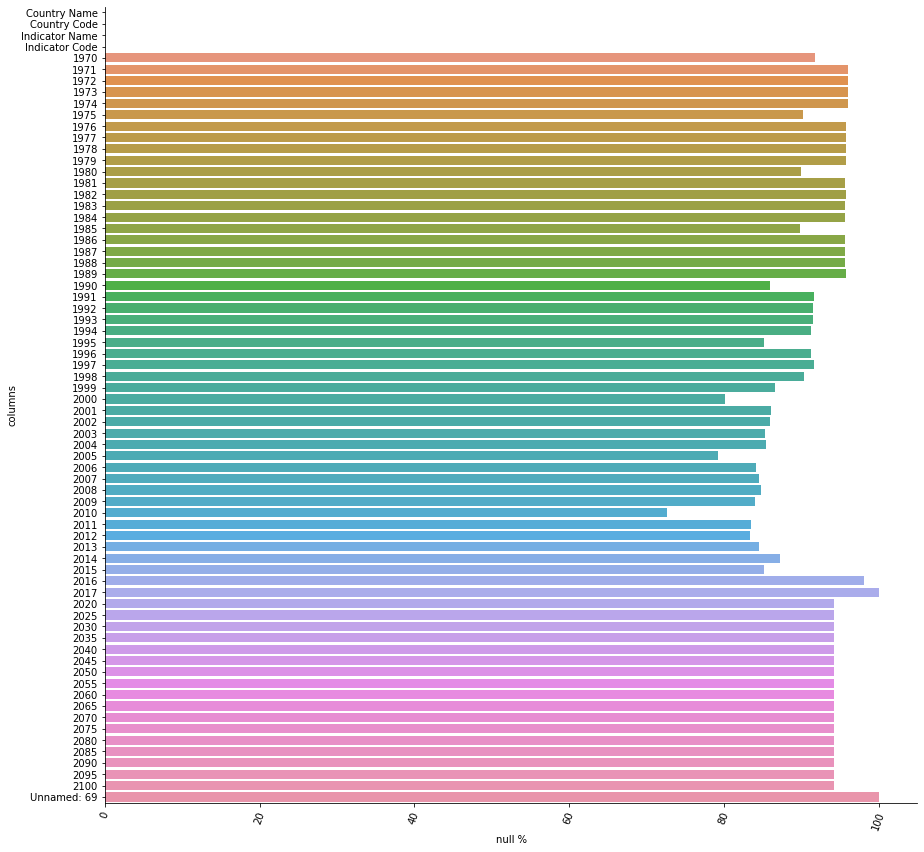

In [25]:
plot_df_xy(data_na, 'null %', 'columns', 12)

In [26]:
available_count = get_df_avalaible_values(data['Data']).sort_values(by='percent_available',ascending=False)
available_count

,Indicator Code,percent_available
2533,SP.POP.TOTL,69.84
2307,SP.POP.GROW,69.80
2483,SP.POP.1564.TO.ZS,64.13
2532,SP.POP.TOTL.MA.ZS,64.07
2530,SP.POP.TOTL.FE.ZS,64.07
...,...,...
881,LO.EGRA.LSTN.0.FAN.2GRD,0.01
880,LO.EGRA.LSTN.0.EWE.2GRD,0.01
879,LO.EGRA.LSTN.0.ENG.6GRD,0.01
878,LO.EGRA.LSTN.0.ENG.4GRD,0.01


In [77]:
available_count.head(200)

,Indicator Code,percent_available
2533,SP.POP.TOTL,69.84
2307,SP.POP.GROW,69.80
2483,SP.POP.1564.TO.ZS,64.13
2532,SP.POP.TOTL.MA.ZS,64.07
2530,SP.POP.TOTL.FE.ZS,64.07
...,...,...
2502,SP.POP.0610.FE.UN,29.98
2375,SP.POP.AG19.MA.UN,29.98
2478,SP.POP.1419.MA.UN,29.98
2481,SP.POP.1524.MA.UN,29.98


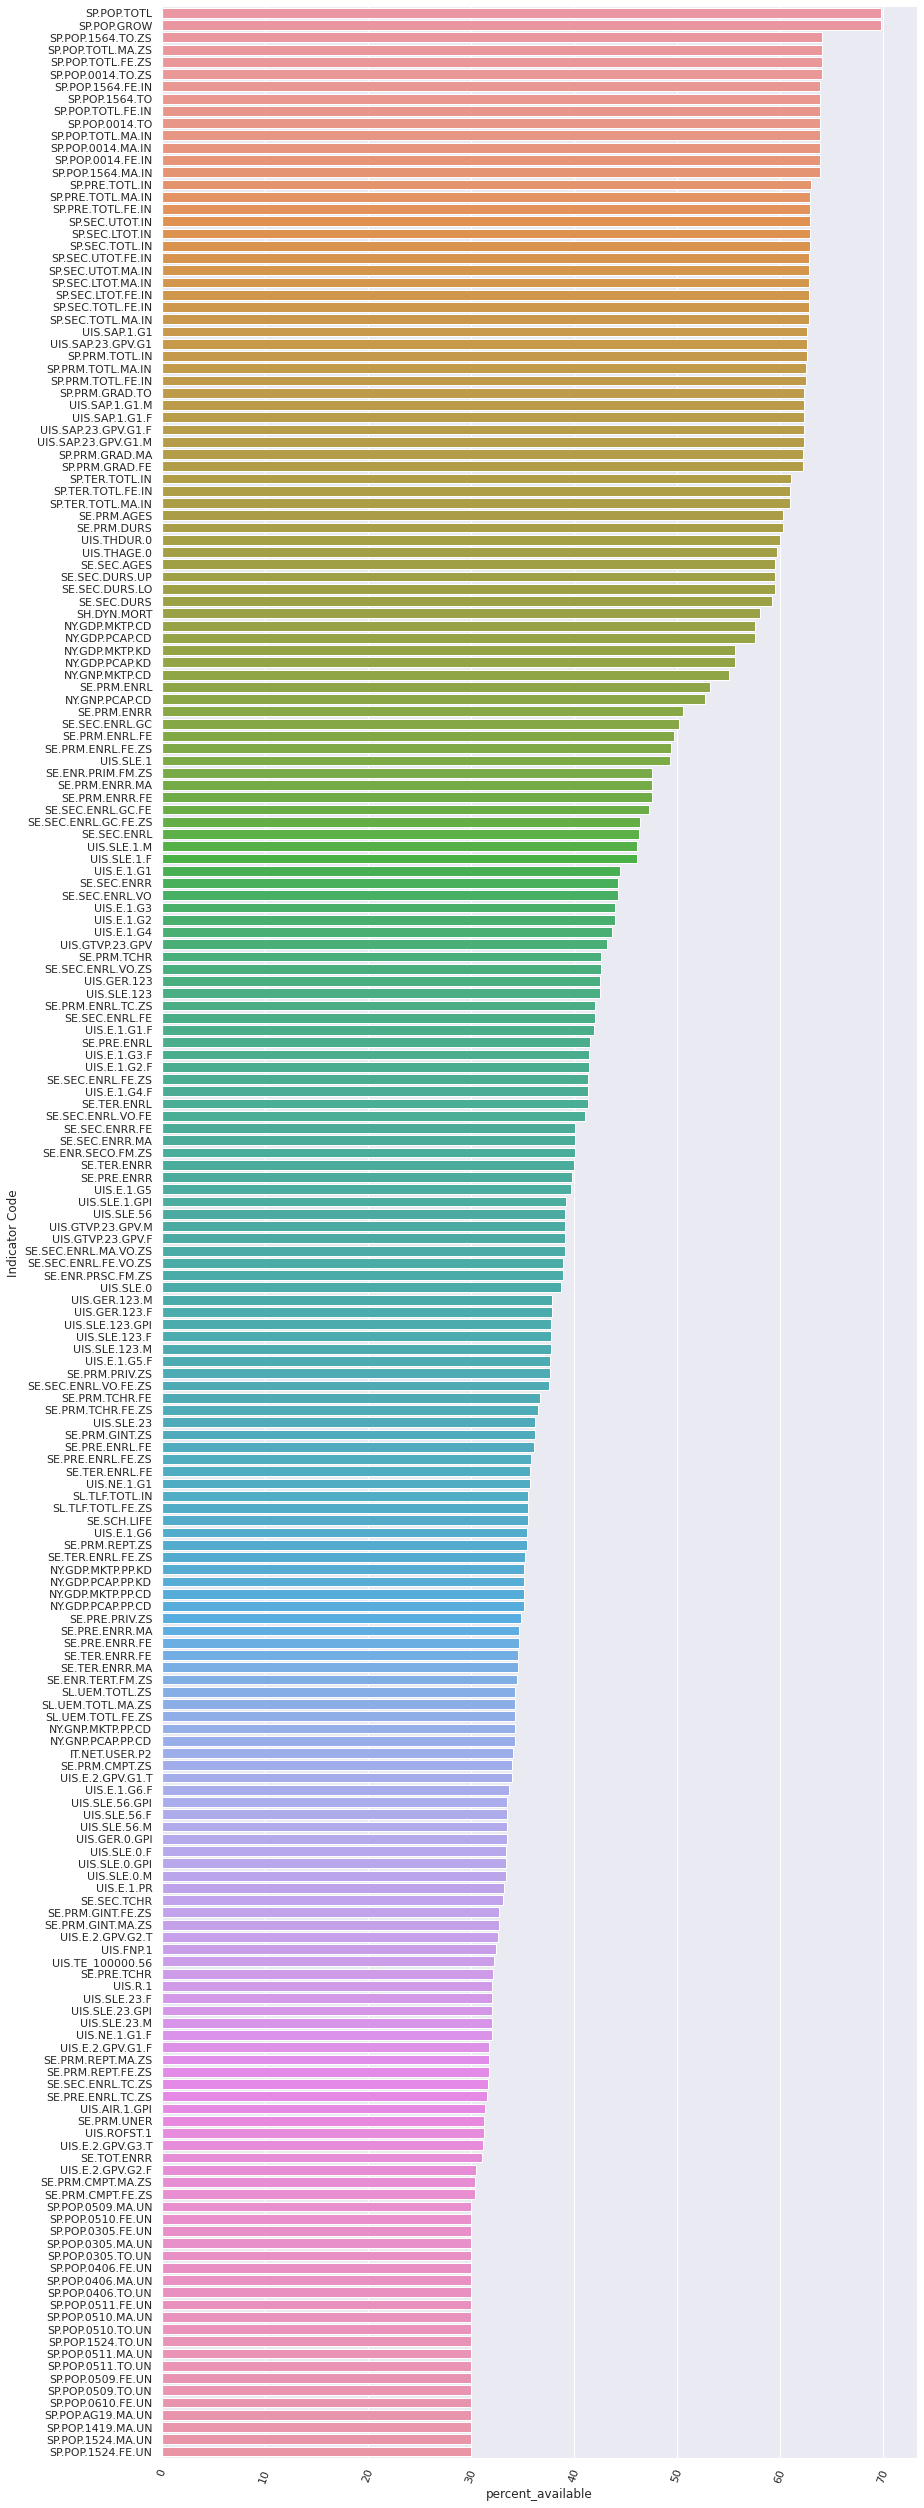

In [27]:
# take top 200 results from dataframe and plot them
plot_df_xy(available_count.head(200), 'percent_available', 'Indicator Code', 35, 13)

### Get indicators with most avalaible data

#### Select top indicators ( >45% available data)

In [28]:
available_count

,Indicator Code,percent_available
2533,SP.POP.TOTL,69.84
2307,SP.POP.GROW,69.80
2483,SP.POP.1564.TO.ZS,64.13
2532,SP.POP.TOTL.MA.ZS,64.07
2530,SP.POP.TOTL.FE.ZS,64.07
...,...,...
881,LO.EGRA.LSTN.0.FAN.2GRD,0.01
880,LO.EGRA.LSTN.0.EWE.2GRD,0.01
879,LO.EGRA.LSTN.0.ENG.6GRD,0.01
878,LO.EGRA.LSTN.0.ENG.4GRD,0.01


In [29]:
results_top = available_count.loc[available_count['percent_available'] > 45].sort_values(by='percent_available',ascending=False)
results_top.shape

(70, 2)

In [30]:
results_top.head()

,Indicator Code,percent_available
2533,SP.POP.TOTL,69.84
2307,SP.POP.GROW,69.80
2483,SP.POP.1564.TO.ZS,64.13
2532,SP.POP.TOTL.MA.ZS,64.07
2530,SP.POP.TOTL.FE.ZS,64.07


In [31]:
# vérifier le taux de null dans les colonnes / années des indicateurs de results_top

## lister indicateurs du top filtré
results_top_col = [results_top['Indicator Code'].unique()][0]

## obtenir data['Data'] avec uniquement indicateurs filtrés
top_data = data['Data'].loc[data['Data']['Indicator Code'].isin(results_top_col)]

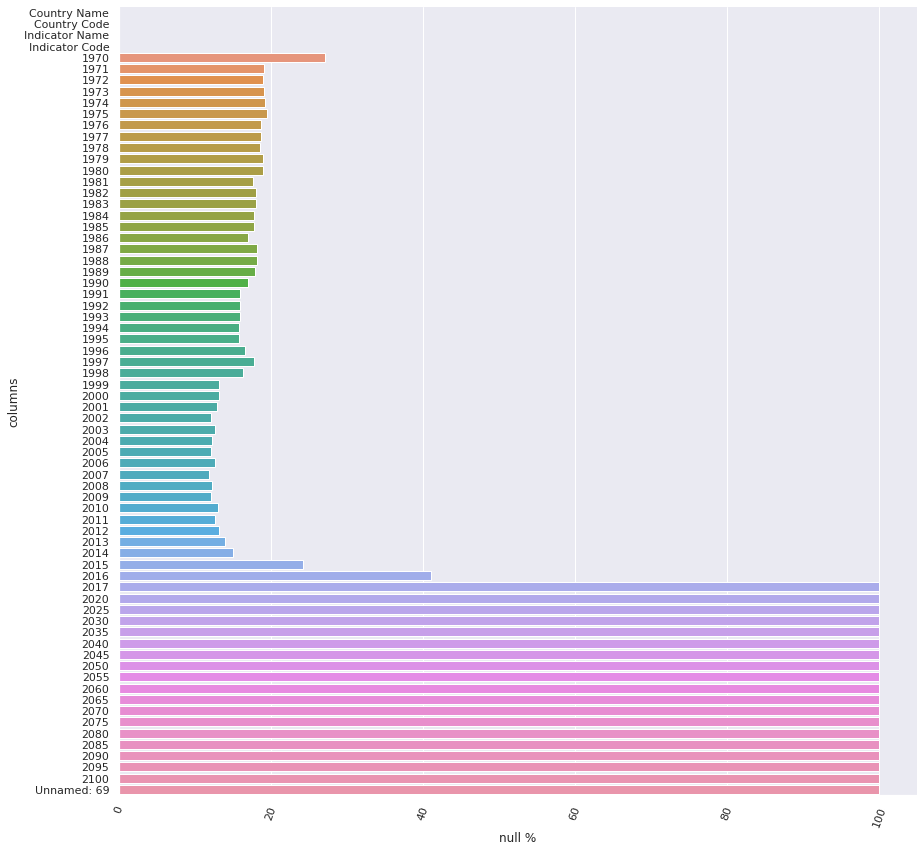

In [32]:
top_data_na = get_df_columns_na(top_data)
plot_df_xy(top_data_na, 'null %', 'columns', 12)

#### Drop empty columns (years)

In [33]:
# find columns with 100% missing values
top_data_high_miss = top_data_na.loc[top_data_na["null %"] >= 100].index

# drop columns with 100% missing values
top_data_2 = top_data.drop(top_data_high_miss, axis = 1)
top_data_2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [34]:
values_top_data_2 = get_df_avalaible_values(top_data_2).sort_values(by='percent_available',ascending=False)
values_top_data_2

,Indicator Code,percent_available
61,SP.POP.TOTL,98.07
21,SP.POP.GROW,98.02
53,SP.POP.1564.TO.ZS,90.06
49,SP.POP.0014.TO.ZS,89.97
60,SP.POP.TOTL.MA.ZS,89.97
...,...,...
4,SE.SEC.ENRL.GC.FE,66.35
20,SE.SEC.ENRL.GC.FE.ZS,65.16
2,SE.SEC.ENRL,65.10
63,UIS.SLE.1.F,64.71


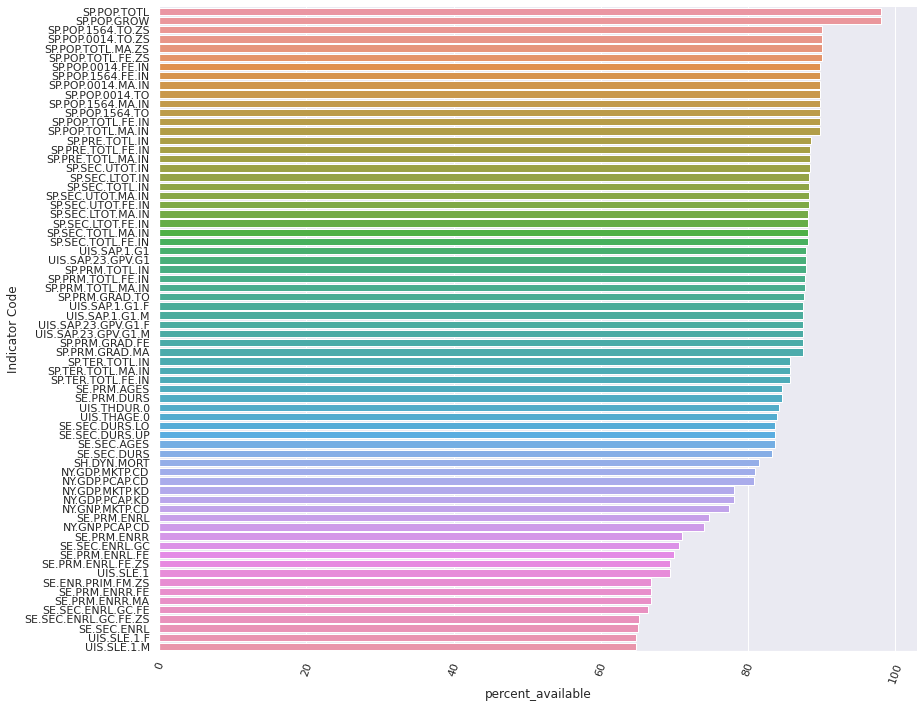

In [35]:
plot_df_xy(values_top_data_2, 'percent_available', 'Indicator Code', 10)

In [99]:
# describe de ces kpi
# plot value vs time pour chaque kpi
# sélectionner ceux qui semblent cohérents par rapport à ce que l'on voit

pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = None
values_indicator_2 = values_top_data_2.join(top_data_2[['Indicator Code', 'Indicator Name']].set_index('Indicator Code'), on='Indicator Code', how = 'right')
val_indic_desc = values_indicator_2.drop_duplicates(subset = ['Indicator Code'], keep = 'first').sort_values(by='percent_available',ascending=False)
val_indic_desc

,Indicator Code,percent_available,Indicator Name
61,SP.POP.TOTL,98.07,"Population, total"
21,SP.POP.GROW,98.02,Population growth (annual %)
53,SP.POP.1564.TO.ZS,90.06,"Population, ages 15-64 (% of total)"
49,SP.POP.0014.TO.ZS,89.97,"Population, ages 0-14 (% of total)"
60,SP.POP.TOTL.MA.ZS,89.97,"Population, male (% of total)"
58,SP.POP.TOTL.FE.ZS,89.97,"Population, female (% of total)"
50,SP.POP.0014.FE.IN,89.70,"Population, ages 0-14, female"
54,SP.POP.1564.FE.IN,89.70,"Population, ages 15-64, female"
51,SP.POP.0014.MA.IN,89.70,"Population, ages 0-14, male"
52,SP.POP.0014.TO,89.70,"Population, ages 0-14, total"


In [37]:
# cherrypick indicators regarding their value towards current business questions
## reminder criterias :
## find countries with high "market potential" for distance learning
## be able to figure out the evolution of the "market potential" for each country
## find which (1) country the company should focus on first


## for money income, the income group from data['Country'] should be enough
## => we can remove most income / GDP related data from indicators in data['Data']
country2.groupby(['Income Group']).count()

,Country Code,Short Name,Region
Income Group,,,
High income: OECD,31,31,31
High income: nonOECD,44,44,44
Low income,34,34,34
Lower middle income,50,50,50
Upper middle income,55,55,55


#### Check available data for highest revenue zones



In [41]:
## filter high income zones from data['Data'] dataset
country2[['Country Code', 'Income Group']].groupby(['Income Group']).count()

,Country Code
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


In [80]:
#country2high = country2.loc[country2['Income Group'].str.contains('High', na=False)]
country2high = country2.loc[country2['Income Group'] == 'High income: OECD']
country2high

,Country Code,Short Name,Income Group,Region
11,AUS,Australia,High income: OECD,East Asia & Pacific
12,AUT,Austria,High income: OECD,Europe & Central Asia
15,BEL,Belgium,High income: OECD,Europe & Central Asia
33,CAN,Canada,High income: OECD,North America
34,CHE,Switzerland,High income: OECD,Europe & Central Asia
36,CHL,Chile,High income: OECD,Latin America & Caribbean
50,CZE,Czech Republic,High income: OECD,Europe & Central Asia
51,DEU,Germany,High income: OECD,Europe & Central Asia
54,DNK,Denmark,High income: OECD,Europe & Central Asia
65,ESP,Spain,High income: OECD,Europe & Central Asia


In [81]:
country2high.groupby(['Income Group']).count()

,Country Code,Short Name,Region
Income Group,,,
High income: OECD,31,31,31


In [82]:
high_inc_data = data['Data'].loc[data['Data']['Country Code'].isin(country2high['Country Code'])]

In [83]:
high_inc_available_count = get_df_avalaible_values(high_inc_data).sort_values(by='percent_available',ascending=False)
high_inc_available_count

,Indicator Code,percent_available
2325,SP.SEC.TOTL.MA.IN,71.21
2529,SP.POP.TOTL.FE.IN,71.21
2419,SP.POP.0014.TO.ZS,71.21
2323,SP.SEC.TOTL.IN,71.21
2324,SP.SEC.TOTL.FE.IN,71.21
...,...,...
2722,SABER.GRVT.GOAL8.LVL6,0.00
2721,SABER.GRVT.GOAL8.LVL5,0.00
2720,SABER.GRVT.GOAL8.LVL4,0.00
2719,SABER.GRVT.GOAL8.LVL3,0.00


In [84]:
high_inc_available_count.head(200)

,Indicator Code,percent_available
2325,SP.SEC.TOTL.MA.IN,71.21
2529,SP.POP.TOTL.FE.IN,71.21
2419,SP.POP.0014.TO.ZS,71.21
2323,SP.SEC.TOTL.IN,71.21
2324,SP.SEC.TOTL.FE.IN,71.21
...,...,...
2459,SP.POP.1218.FE.UN,39.39
2460,SP.POP.1218.MA.UN,39.39
2461,SP.POP.1218.TO.UN,39.39
2449,SP.POP.1118.TO.UN,39.39


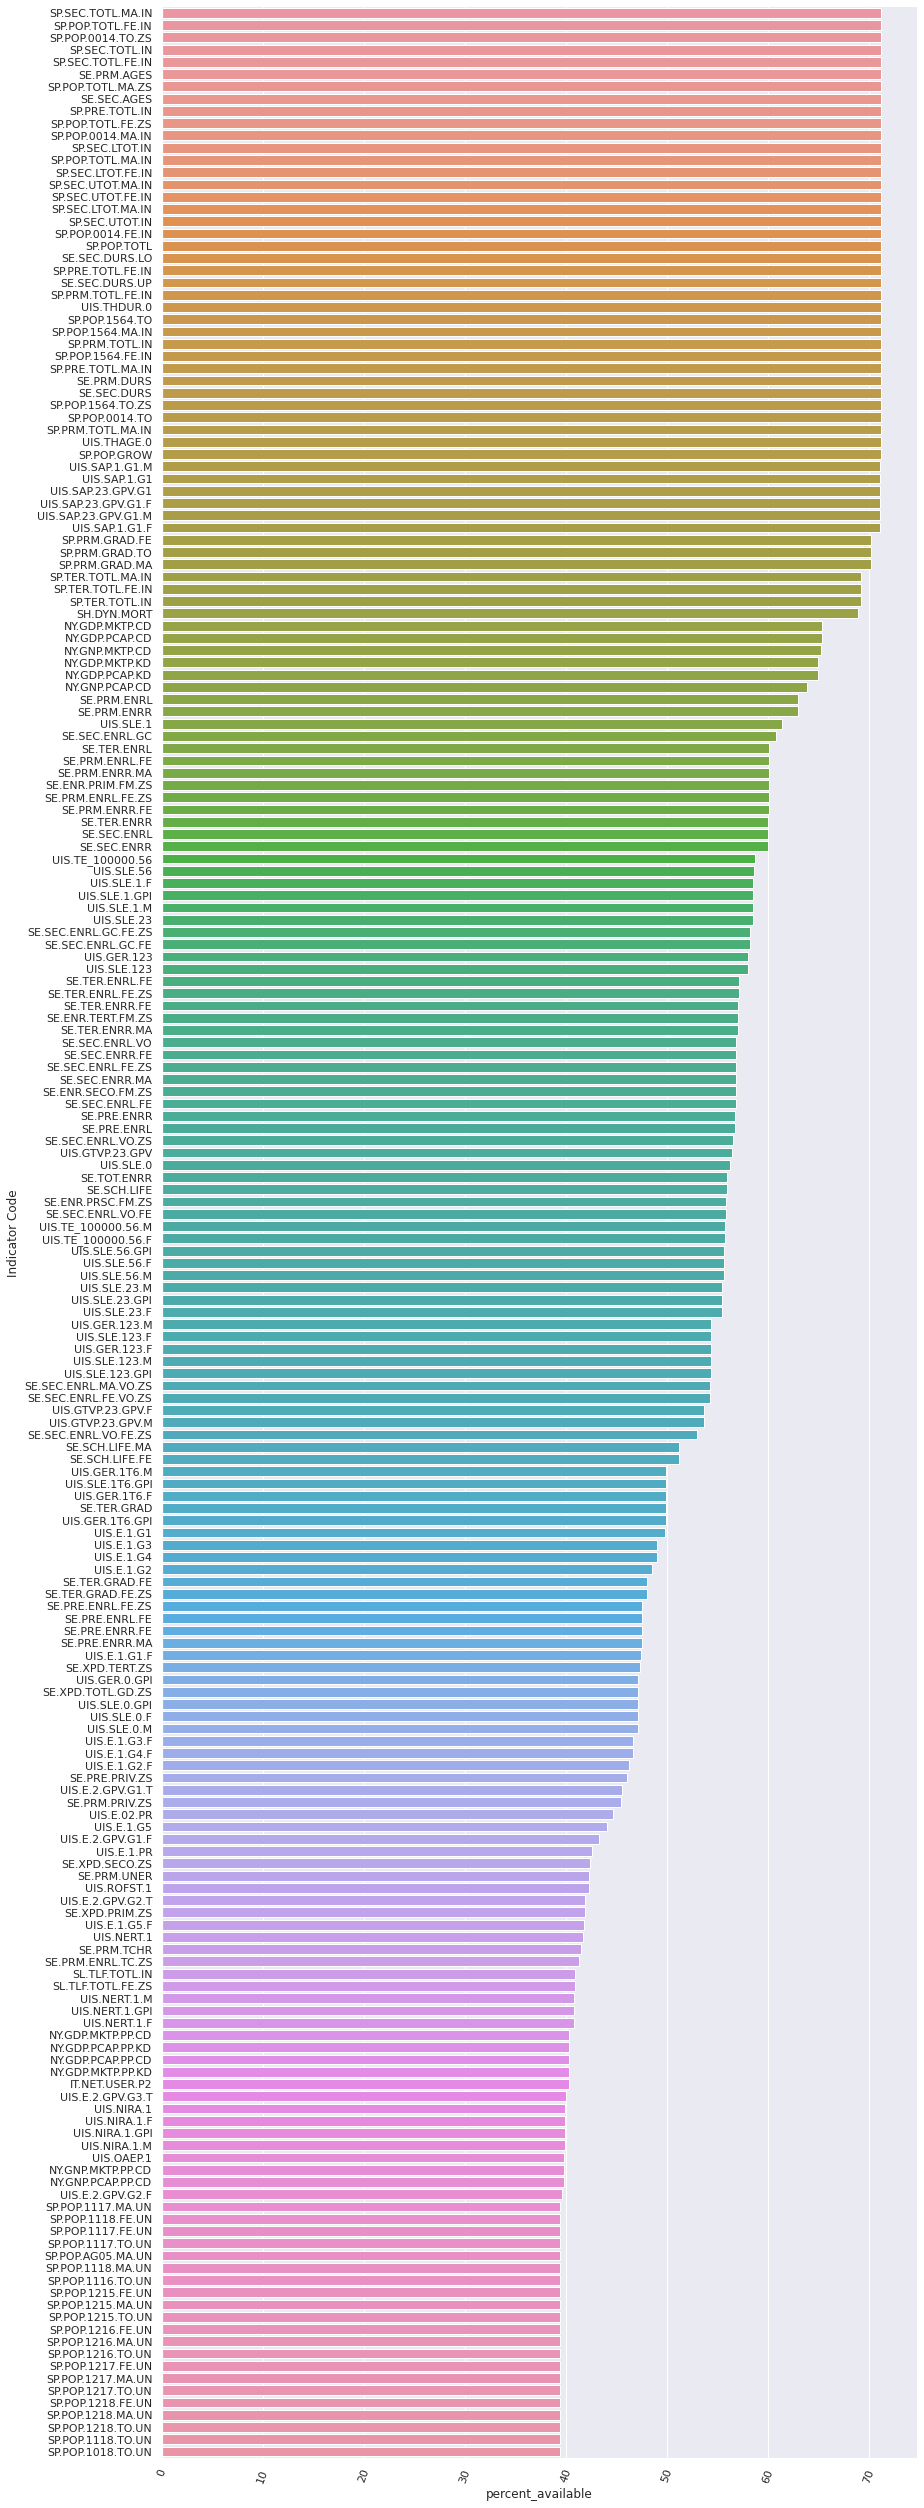

In [85]:
plot_df_xy(high_inc_available_count.head(200), 'percent_available', 'Indicator Code', 35, 13)

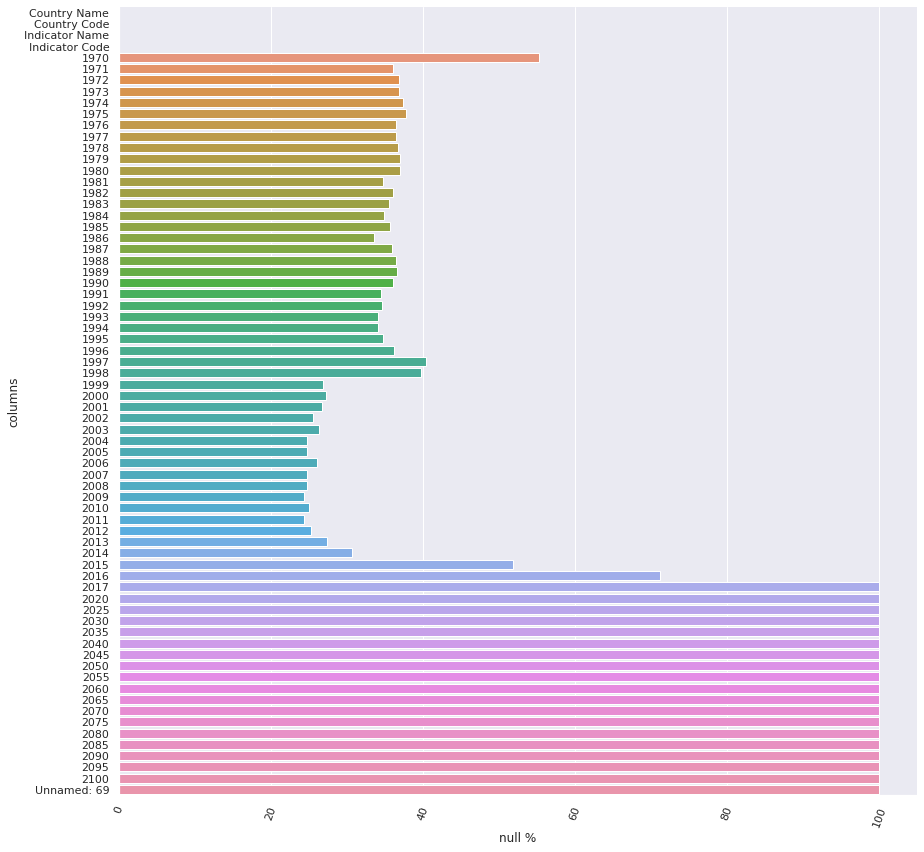

In [86]:
high_inc_results_top = high_inc_available_count.loc[high_inc_available_count['percent_available'] > 45].sort_values(by='percent_available',ascending=False)
high_inc_results_top_col = [high_inc_results_top['Indicator Code'].unique()][0]

## obtenir data['Data'] avec uniquement indicateurs filtrés
high_inc_top_data = data['Data'].loc[data['Data']['Indicator Code'].isin(high_inc_results_top_col)]
high_inc_top_data_na = get_df_columns_na(high_inc_top_data)
plot_df_xy(high_inc_top_data_na, 'null %', 'columns', 12)

# Select / Cherrypick indicators


In [100]:
## list cherrypicked_indicators
cherrypicked_indicators = [
    'SP.POP.GROW',
    
    ]
## check descriptions of listed indicators
val_indic_desc.loc[~val_indic_desc['Indicator Code'].isin(cherrypicked_indicators)]

,Indicator Code,percent_available,Indicator Name
61,SP.POP.TOTL,98.07,"Population, total"
53,SP.POP.1564.TO.ZS,90.06,"Population, ages 15-64 (% of total)"
49,SP.POP.0014.TO.ZS,89.97,"Population, ages 0-14 (% of total)"
60,SP.POP.TOTL.MA.ZS,89.97,"Population, male (% of total)"
58,SP.POP.TOTL.FE.ZS,89.97,"Population, female (% of total)"
50,SP.POP.0014.FE.IN,89.70,"Population, ages 0-14, female"
54,SP.POP.1564.FE.IN,89.70,"Population, ages 15-64, female"
51,SP.POP.0014.MA.IN,89.70,"Population, ages 0-14, male"
52,SP.POP.0014.TO,89.70,"Population, ages 0-14, total"
55,SP.POP.1564.MA.IN,89.70,"Population, ages 15-64, male"


In [ ]:
## check if some previously cherrypicked indicators have enough available data
cherry_indics = ['SE.TER.ENRR', 'SE.TER.ENRR', 'SE.SCH.LIFE', 'UIS.XSPENDP.23.FDPUB.FNS', 'UIS.XSPENDP.56.FDPUB.FNS', 'UIS.XGDP.56.FSGOV']
top_200_results.loc[top_200_results['Indicator Code'].isin(cherry_indics)]


In [ ]:
##check similarly for all results

result.loc[result['Indicator Code'].isin(cherry_indics)]

# Aggregate numerical data

In [89]:
## Aggregate to obtain following shape / columns :
##
## country name | country code | indicator code | moyenne | mediane | nan count | nan % / standard deviation

In [ ]:
## sélectionner top 10

## pour chacune des variables, regarder la distribution des valeurs (violin chart)
## => regarder si il y a des valeurs spécifiques (distribution extreme ou non, etc)

## regarder si certaines sont corrélées : étude de corrélation, matrice de corrélation
## => https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html

## essayer de déterminer pays/endroits où la tendance n'a pas été à 
##        la hausse mais que des indicateurs diraient que cela pourrait aller à la hausse


## faire infos type "describe()" sur les kpi

## plotter en violin


## (ACP) / PCA https://www.google.com/search?q=pca+data


## zones géo